In [1]:
# Import everything we need
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# 1. Load data and preprocessing data
data = pd.read_csv("./Resources/2024_energy_efficiency_data.csv")

# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)

# One hot
data = pd.get_dummies(
    data,
    columns=["Orientation", "Glazing Area Distribution"],
    prefix=["Orientation", "GlazingAreaDist"],
    dtype=int,
)

# Split to X and Y
X = data.drop(columns=["Heating Load", "Cooling Load"])
Y = data[["Heating Load", "Cooling Load"]]

# Scale data to range of [0, 1]
to_scale = [
    "# Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area",
    "Overall Height",
    "Glazing Area",
]

for category in to_scale:
    X[category] = (X[category] - X[category].min()) / (X[category].max() - X[category].min())

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

Shape of dataset: (768, 10)
Data types and first few rows:
 # Relative Compactness       float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                  float64
Glazing Area                 float64
Glazing Area Distribution    float64
Heating Load                 float64
Cooling Load                 float64
dtype: object    # Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.90         563.5      318.5     122.50             7.0   
4                    0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load

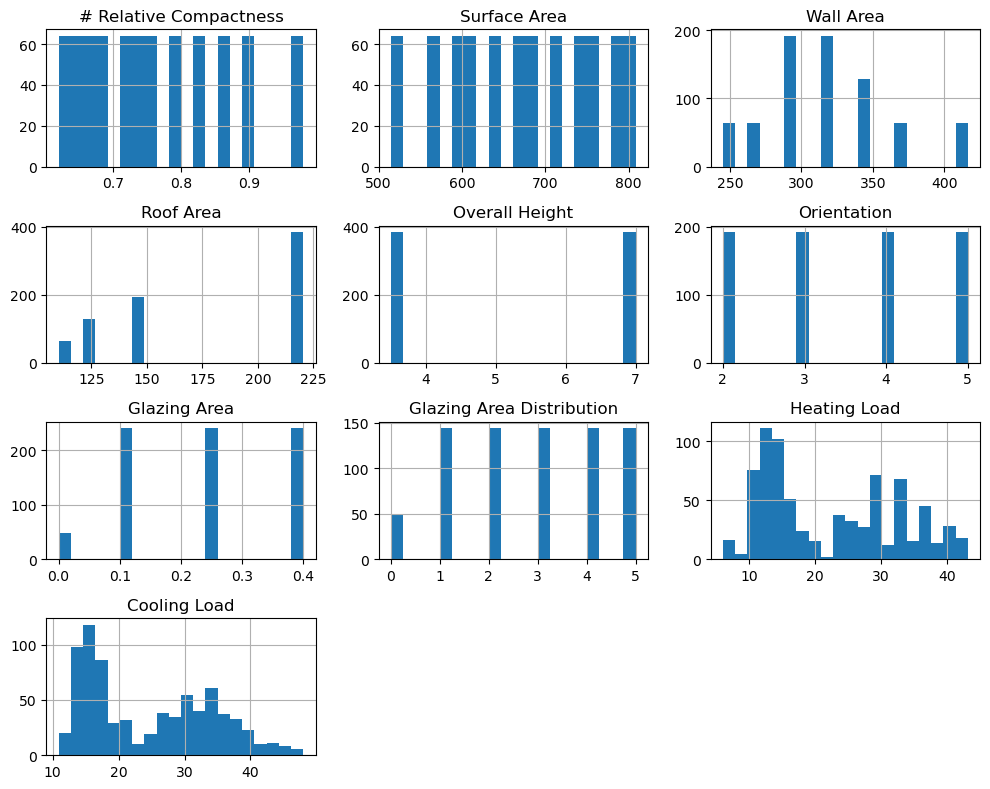

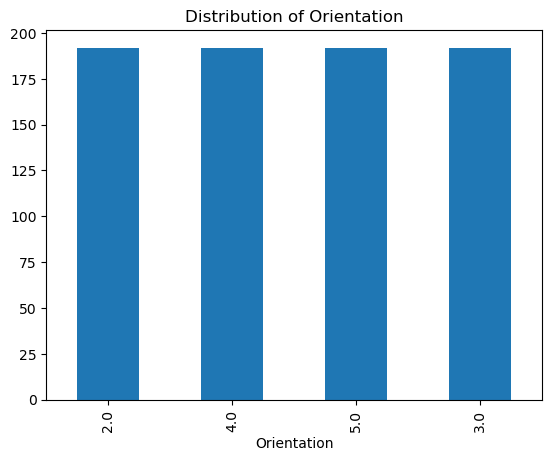

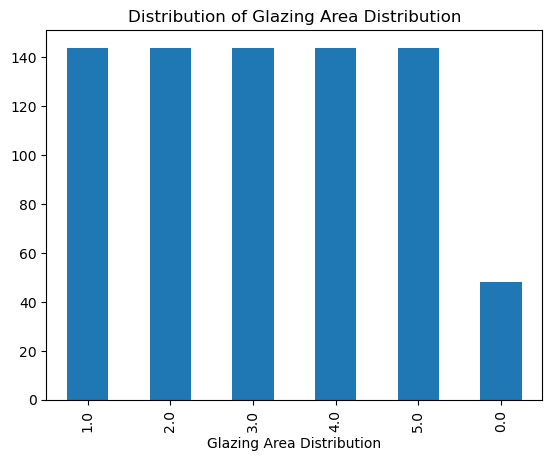

Correlation matrix:
                            # Relative Compactness  Surface Area     Wall Area  \
# Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                        -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                           -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                           -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                       8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                          4.357512e-17  2.793819e-16  3.957426e-17   
Glazing Area                         3.569803e-15  2.896830e-15  1.900780e-16   
Glazing Area Distribution            1.090094e-15  9.211165e-16  2.385022e-16   
Heating Load                         6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling Load                         6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof Area  Overall Height   Orientation  \
# Relative Com

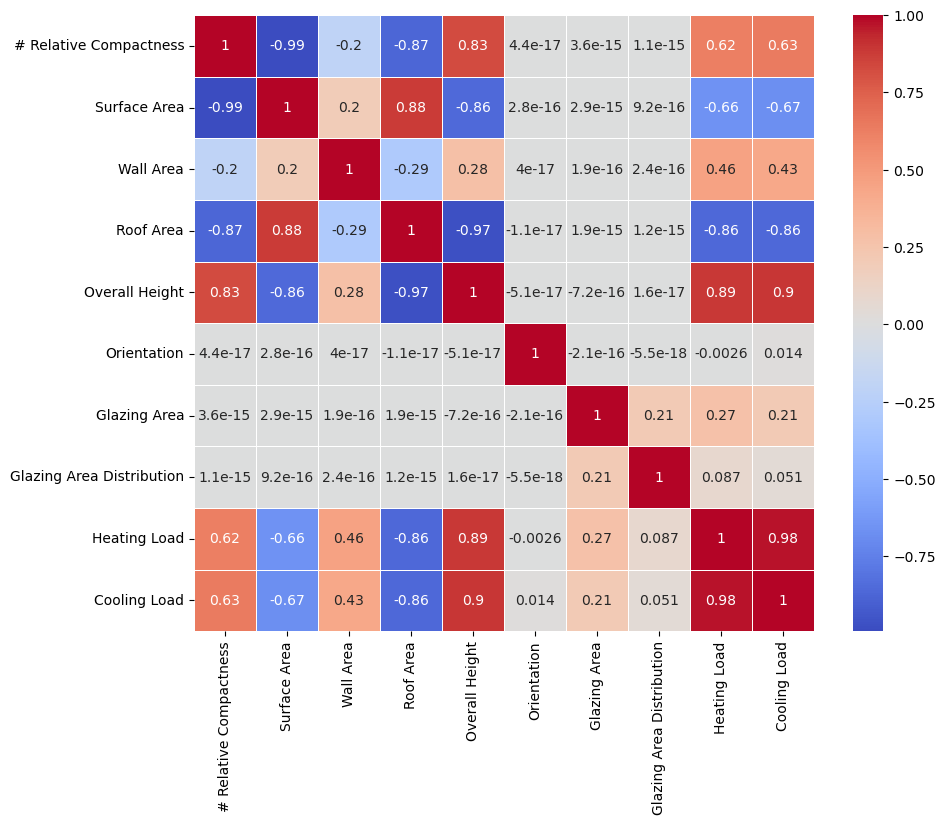

Heating Load Distribution:
 count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating Load, dtype: float64


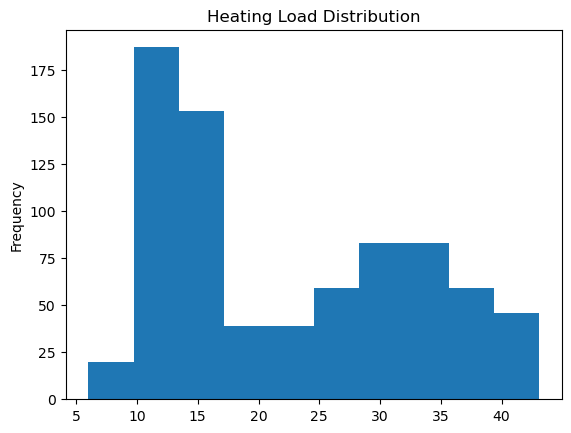

Cooling Load Distribution:
 count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Cooling Load, dtype: float64


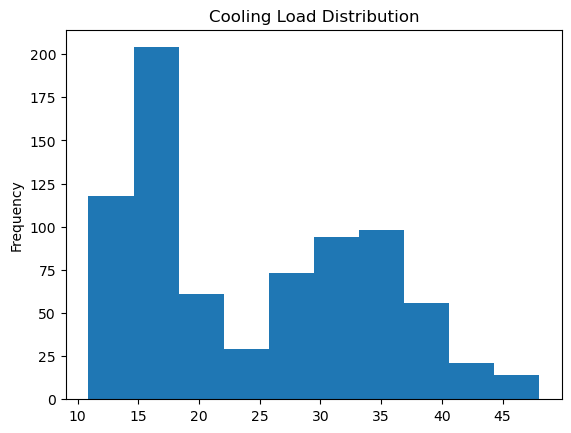

Data after one-hot encoding:
    # Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.90         563.5      318.5     122.50             7.0   
4                    0.90         563.5      318.5     122.50             7.0   

   Glazing Area  Heating Load  Cooling Load  Orientation_2.0  Orientation_3.0  \
0           0.0         15.55         21.33             True            False   
1           0.0         15.55         21.33            False            False   
2           0.0         15.55         21.33            False            False   
3           0.0         20.84         28.28             True            False   
4           0.0         21.46         25.38            False             True 

In [13]:
# To understand this dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('./Resources/2024_energy_efficiency_data.csv')

# 1. Initial inspection
print("Shape of dataset:", data.shape)
print("Data types and first few rows:\n", data.dtypes, data.head())

# 2. Check for missing data
missing_data = data.isnull().sum()
print("Missing data in each column:\n", missing_data)

# 3. Summary statistics for numerical features
print("Summary statistics for numerical features:\n", data.describe())

# 4. Unique values in categorical features
categorical_cols = ['Orientation', 'Glazing Area Distribution']
for col in categorical_cols:
    print(f"Unique values in {col}:", data[col].unique())
    print(f"Value counts in {col}:\n", data[col].value_counts())

# 5. Visualizing distributions
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Bar plot for categorical features
for col in categorical_cols:
    data[col].value_counts().plot(kind='bar', title=f'Distribution of {col}')
    plt.show()

# 6. Correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# 7. Target distribution (Heating Load, Cooling Load)
print("Heating Load Distribution:\n", data['Heating Load'].describe())
data['Heating Load'].plot(kind='hist', title='Heating Load Distribution')
plt.show()

print("Cooling Load Distribution:\n", data['Cooling Load'].describe())
data['Cooling Load'].plot(kind='hist', title='Cooling Load Distribution')
plt.show()

# 8. One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['Orientation', 'Glazing Area Distribution'], prefix=['Orientation', 'GlazingAreaDist'])
print("Data after one-hot encoding:\n", data_encoded.head())

# Check training test
print(X_train.columns)


In [3]:
# Create functions to train model
# Initialize weights and biases
def initialize_weights(input_dim, hidden_dim, output_dim):
    # Randomly initialize weights and biases for each layer
    W1 = np.random.uniform(-1/np.sqrt(input_dim), 1/np.sqrt(input_dim), (input_dim, hidden_dim))
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.uniform(-1/np.sqrt(hidden_dim), 1/np.sqrt(hidden_dim), (hidden_dim, output_dim))
    b2 = np.zeros((1, output_dim))
    
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Tanh Function
def tanh(x):
    return np.tanh(x)

# Tanh derivative function
def dtanh(x):
    return 1.0 - np.tanh(x)**2

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# ReLU derivative (for backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, activation_function = "tanh"):
    Z1 = np.dot(X, W1) + b1 
    if activation_function == "relu":
        A1 = relu(Z1)
    elif activation_function == "sigmoid":
        A1 = sigmoid(Z1)
    elif activation_function == "tanh":
        A1 = tanh(Z1)        
    Z2 = np.dot(A1, W2) + b2 
    A2 = Z2                  
    return Z1, A1, Z2, A2

# Backward propagation for regression
def backward_propagation(X, Y, Z1, A1, Z2, A2, W2, activation_function = "tanh"):
    m = X.shape[0]  
    dZ2 = A2 - Y 
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    if activation_function == "relu":
        dZ1 = dA1 * relu_derivative(Z1)
    elif activation_function == "sigmoid":
        dZ1 = dA1 * sigmoid_derivative(sigmoid(Z1))
    elif activation_function == "tanh":
        dZ1 = dA1 * dtanh(Z1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0)
    
    return dW1, db1, dW2, db2


# Update weights and biases
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Save weights and biases
def save_parameters(W1, b1, W2, b2):
    file_path = "./Parameters"
    np.save(f"{file_path}/W1.npy",W1)
    np.save(f"{file_path}/W2.npy",W2)
    np.save(f"{file_path}/b1.npy",b1)
    np.save(f"{file_path}/b2.npy",b2)


In [4]:
# Train the model
def train(
    X,
    Y,
    input_dim,
    hidden_dim,
    output_dim,
    epochs,
    learning_rate,
    train_losses,
    X_test,
    Y_test,
    test_losses,
):
    # Define activation function
    activation_function = "tanh" 

    # Initialize weights
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)

    for i in range(epochs):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2, activation_function)

        # Calculate loss (MSE for regression)
        loss = np.mean((A2 - Y) ** 2)

        # Saving training losses to plot learning curve
        train_losses.append(loss)

        if i % 100 == 0:
            print(f"Epoch {i+1}/{epochs}, Loss: {loss}")

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2, W2, activation_function)

        # Update weights
        W1, b1, W2, b2 = update_weights(
            W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate
        )

        # Test every single version
        _, _, _, Y_pred_heating = forward_propagation(X_test, W1, b1, W2, b2, activation_function)
        test_loss = np.mean((Y_pred_heating - Y_test) ** 2)
        test_losses.append(test_loss)

    return W1, b1, W2, b2

In [7]:
# Train Processing
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 8  # Example hidden layer size (you can adjust this)
output_dim = 1  # Predicting one continuous value (Heating Load)
epochs = 5001  # You can adjust the number of epochs
learning_rate = 0.05  # Learning rate for gradient descent
train_losses = []
test_losses = []

# Train the model
W1, b1, W2, b2 = train(X_train, Y_train['Heating Load'].values.reshape(-1, 1),
                       input_dim, hidden_dim, output_dim, epochs, learning_rate, train_losses, X_test, Y_test[["Heating Load"]], test_losses)

# Save all weights and biases
save_parameters(W1, b1, W2, b2)

Epoch 1/5001, Loss: 617.0373717736902
Epoch 101/5001, Loss: 7.759825978845326
Epoch 201/5001, Loss: 6.938603032418119
Epoch 301/5001, Loss: 6.8114611041467725
Epoch 401/5001, Loss: 6.4622965649438395
Epoch 501/5001, Loss: 5.8828164965346454
Epoch 601/5001, Loss: 5.353243992741223
Epoch 701/5001, Loss: 4.902153198987548
Epoch 801/5001, Loss: 4.520718230218413
Epoch 901/5001, Loss: 4.193031886413613
Epoch 1001/5001, Loss: 3.902037323627806
Epoch 1101/5001, Loss: 3.641129670191538
Epoch 1201/5001, Loss: 3.410579518531001
Epoch 1301/5001, Loss: 3.2103571482521644
Epoch 1401/5001, Loss: 3.038089890632906
Epoch 1501/5001, Loss: 2.8897753535981434
Epoch 1601/5001, Loss: 2.7655704928398155
Epoch 1701/5001, Loss: 2.6640315812575492
Epoch 1801/5001, Loss: 2.5814095200272784
Epoch 1901/5001, Loss: 2.510812190284949
Epoch 2001/5001, Loss: 2.4443128634738045
Epoch 2101/5001, Loss: 2.378402057885932
Epoch 2201/5001, Loss: 2.3102826326166976
Epoch 2301/5001, Loss: 2.241154850158506
Epoch 2401/5001, L

In [ ]:
# Train model for Cooling Load
W1, b1, W2, b2 = train(X_train, Y_train['Cooling Load'].values.reshape(-1, 1),
                       input_dim, hidden_dim, output_dim, epochs, learning_rate)

# Make predictions on the test set for Cooling Load
_, _, _, Y_pred_cooling = forward_propagation(X_test, W1, b1, W2, b2)

# Evaluate the performance using MSE
mse_cooling = mean_squared_error(Y_test['Cooling Load'], Y_pred_cooling)
print(f'Cooling Load - Mean Squared Error (MSE) on Test Set: {mse_cooling}')


In [8]:
# Question 1-a: Predict Heating Load, Evaluate performance using RMSE for Training Data and Test Data  
_, _, _, Y_pred_heating_test = forward_propagation(X_test, W1, b1, W2, b2)
_, _, _, Y_pred_heating_train = forward_propagation(X_train, W1, b1, W2, b2)

Heating Load - Mean Squared Error (MSE) on Train Set: 1.1953431242333474
Heating Load - Root Mean Squared Error (RMSE) on Test Set: 1.0933174855609633
Heating Load - Mean Squared Error (MSE) on Test Set: 1.333993423445209
Heating Load - Root Mean Squared Error (RMSE) on Test Set: 1.1549863304148709


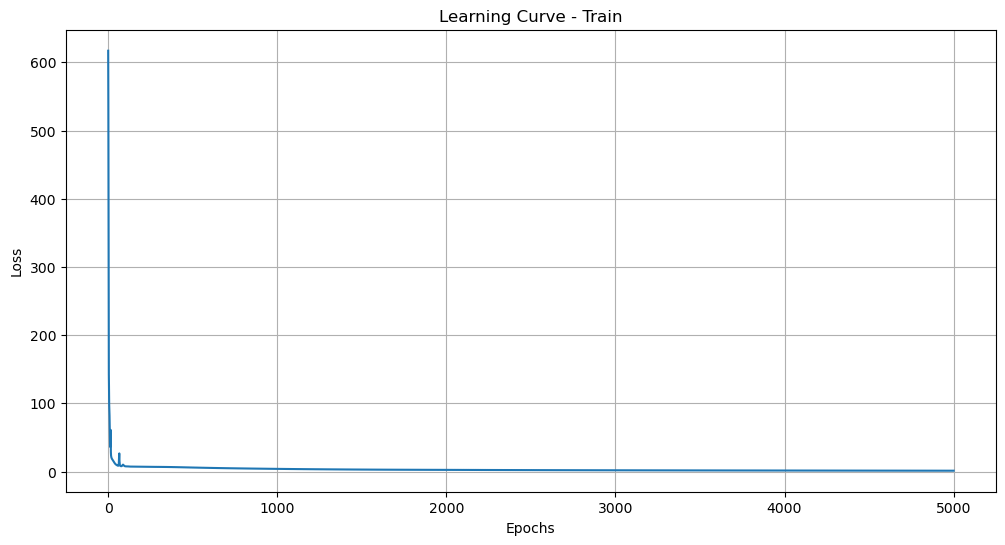

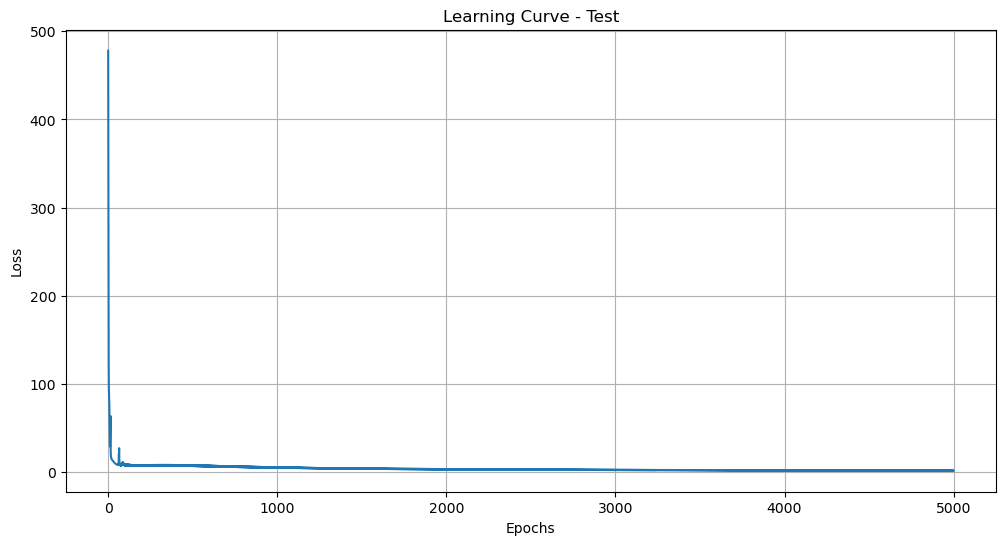

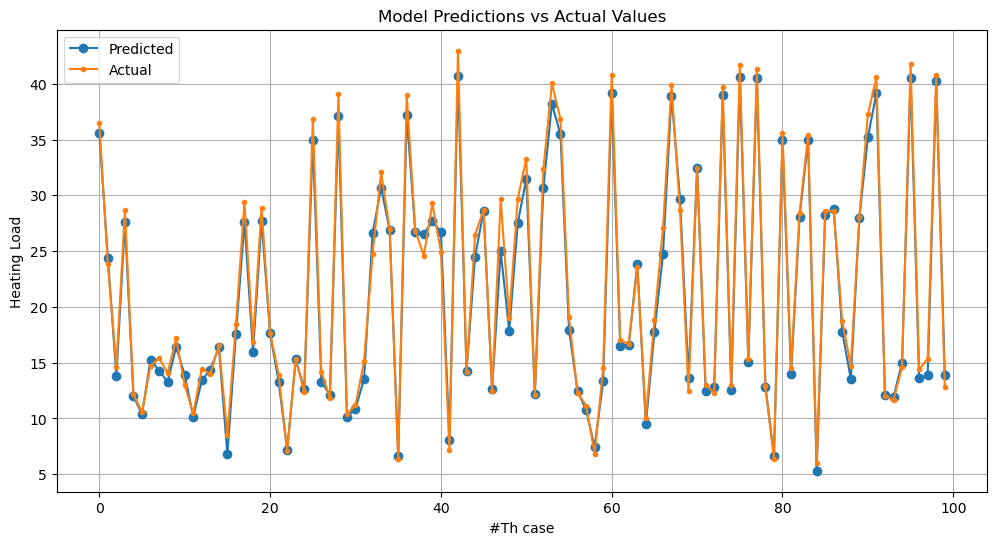

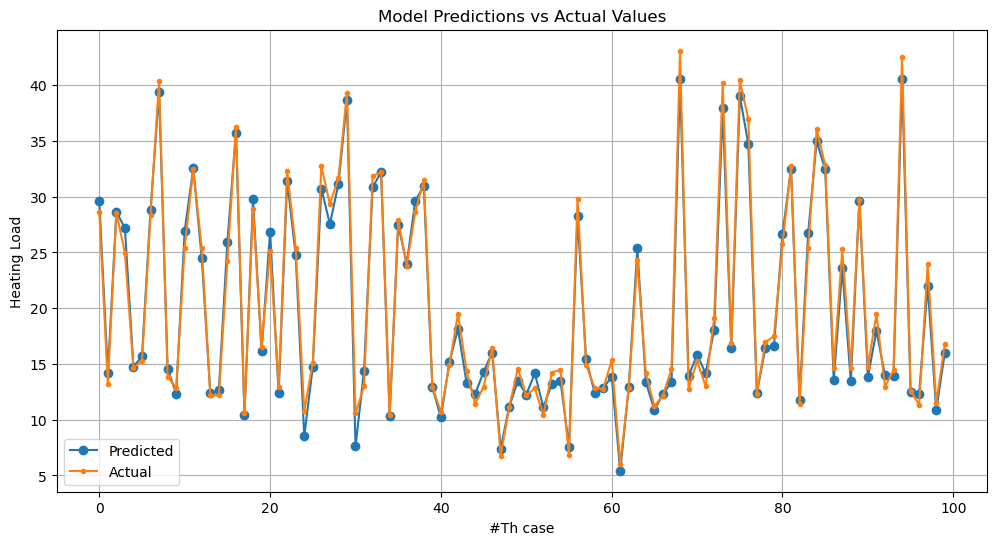

\Train:

Predicted: 35.58894681065277 - Actual: 36.81

Predicted: 24.39080908684069 - Actual: 27.69

Predicted: 13.846790285597447 - Actual: 17.22

Predicted: 27.573886820235845 - Actual: 34.73

Predicted: 12.015327362344646 - Actual: 15.03

Predicted: 10.372693202106401 - Actual: 13.8

Predicted: 15.264040618426538 - Actual: 18.1

Predicted: 14.298847890052382 - Actual: 19.34

Predicted: 13.291019459977488 - Actual: 16.11

Predicted: 16.417096457902076 - Actual: 17.21

\Test:

Predicted: 29.612258362359583 - Actual: 33.54

Predicted: 14.165026929551185 - Actual: 16.19

Predicted: 28.645980093644294 - Actual: 29.59

Predicted: 27.17910591507169 - Actual: 29.43

Predicted: 14.73938966417083 - Actual: 15.56

Predicted: 15.683891347651766 - Actual: 17.82

Predicted: 28.817868554994543 - Actual: 29.28

Predicted: 39.40767668405556 - Actual: 39.7

Predicted: 14.564877043044353 - Actual: 14.75

Predicted: 12.33867246875287 - Actual: 14.37



In [11]:
# Question 1-b: 
# Evaluate the performance for TRAIN using Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
mse_heating = mean_squared_error(Y_train['Heating Load'], Y_pred_heating_train)
print(f'Heating Load - Mean Squared Error (MSE) on Train Set: {mse_heating}')
print(f'Heating Load - Root Mean Squared Error (RMSE) on Test Set: {np.sqrt(mse_heating)}')

# Evaluate the performance for TEST using Mean Squared Error (RMSE)
mse_heating = mean_squared_error(Y_test['Heating Load'], Y_pred_heating_test)
print(f'Heating Load - Mean Squared Error (MSE) on Test Set: {mse_heating}')
print(f'Heating Load - Root Mean Squared Error (RMSE) on Test Set: {np.sqrt(mse_heating)}')

import matplotlib.pyplot as plt

# Visualize the learning curve (TRAIN DATA) 
plt.figure(figsize=(12, 6))
plt.plot(train_losses)
plt.title("Learning Curve - Train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Visualize the learning curve (TEST DATA) 
plt.figure(figsize=(12, 6))
plt.plot(test_losses)
plt.title("Learning Curve - Test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Number of cases - For clearer visualize
cases = 100

# Regression result with training labels
plt.figure(figsize=(12, 6))
plt.plot(Y_pred_heating_train.flatten()[:cases], label="Predicted", linestyle='-', marker='o')
plt.plot(Y_train["Heating Load"].values[:cases], label="Actual", linestyle='-', marker='.')
plt.title("Model Predictions vs Actual Values")
plt.xlabel("#Th case")
plt.ylabel("Heating Load")
plt.legend()
plt.grid(True)
plt.show()

# Regression result with testing labels
plt.figure(figsize=(12, 6))
plt.plot(Y_pred_heating_test.flatten()[:cases], label="Predicted", linestyle='-', marker='o')
plt.plot(Y_test["Heating Load"].values[:cases], label="Actual", linestyle='-', marker='.')
plt.title("Model Predictions vs Actual Values")
plt.xlabel("#Th case")
plt.ylabel("Heating Load")
plt.legend()
plt.grid(True)
plt.show()

# Get ten pair of sample for those experiments
print("\Train:\n")
for i in range(10):
    print("Predicted: "+ str(Y_pred_heating_train.flatten()[i]) + " - Actual: " + str(Y_train["Cooling Load"].values[i]) + "\n")

print("\Test:\n")
for i in range(10):
    print("Predicted: "+ str(Y_pred_heating_test.flatten()[i]) + " - Actual: " + str(Y_test["Cooling Load"].values[i]) + "\n")

In [63]:
# Try to reshape - Just for ensure the type of data before we visualize them (Optional)
print(Y_pred_heating_test.flatten().shape)
print(Y_test["Heating Load"].values.shape)

(192,)
(192,)
